In [1]:
# class jy_summary:
#     def __init__(self, max_step):
#         self.accurarcy = np.zeros(max_step)
#         self.entropy = np.zeros(max_step)
#         self.confusion_matrix = [None for ii in range(max_step)]
#         self.learning_rate = np.zeros(max_step)
#         self.step = np.zeros(max_step)
#         self.triplet_loss_hard = np.zeros(max_step)
#         self.triplet_loss_easy = np.zeros(max_step)

#     def update(self, which_step, accuracy_value, entropy_value, confusion_matrix_value, triplet_loss_hard_value, triplet_loss_easy_value, learning_rate_value):
#         self.step = which_step
#         self.accurarcy[which_step] = accuracy_value
#         self.entropy[which_step] = entropy_value
#         self.confusion_matrix[which_step] = confusion_matrix_value
#         self.learning_rate[which_step] = learning_rate_value
#         self.triplet_loss_easy[which_step] = triplet_loss_easy_value
#         self.triplet_loss_hard[which_step] = triplet_loss_hard_value
#     def save(self, directory):
#         with open(directory, 'wb') as f:
#             pickle.dump(self, f)
#     def load(self, directory):
#         with open(directory, 'rb') as f:
#             last_point = pickle.load(f)
#         # assign value from last point to current point.
#         last_time_max_step = last_point.step
#         self.step = last_time_max_step
#         self.accurarcy[0:last_time_max_step] = last_point.accurarcy[0:last_time_max_step]
#         self.entropy[0:last_time_max_step] = last_point.entropy[0:last_time_max_step]
#         self.confusion_matrix[0:last_time_max_step] = last_point.confusion_matrix[0:last_time_max_step]
#         self.learning_rate[0:last_time_max_step] = last_point.learning_rate[0:last_time_max_step]
#         self.triplet_loss_easy[0:last_time_max_step] = last_point.triplet_loss_easy[0:last_time_max_step]
#         self.triplet_loss_hard[0:last_time_max_step] = last_point.triplet_loss_hard[0:last_time_max_step]


In [1]:
class jy_summary:
    def __init__(self, max_step):
        self.accurarcy = np.zeros(max_step)
        self.entropy = np.zeros(max_step)
        self.confusion_matrix = [None for ii in range(max_step)]
        self.learning_rate = np.zeros(max_step)
        self.learning_rate_encoding = np.zeros(max_step)
        self.step = np.zeros(max_step)
        self.triplet_loss_hard = np.zeros(max_step)
        self.triplet_loss_easy = np.zeros(max_step)

    def update(self, which_step, accuracy_value, entropy_value, confusion_matrix_value, triplet_loss_hard_value, triplet_loss_easy_value, learning_rate_value, learning_rate_encoding_value):
        self.step = which_step
        self.accurarcy[which_step] = accuracy_value
        self.entropy[which_step] = entropy_value
        self.confusion_matrix[which_step] = confusion_matrix_value
        self.learning_rate[which_step] = learning_rate_value
        self.learning_rate_encoding[which_step] = learning_rate_encoding_value
        self.triplet_loss_easy[which_step] = triplet_loss_easy_value
        self.triplet_loss_hard[which_step] = triplet_loss_hard_value
    def save(self, directory):
        with open(directory, 'wb') as f:
            pickle.dump(self, f)
    def load(self, directory):
        with open(directory, 'rb') as f:
            last_point = pickle.load(f)
        # assign value from last point to current point.
        last_time_max_step = last_point.step
        self.step = last_time_max_step
        self.accurarcy[0:last_time_max_step] = last_point.accurarcy[0:last_time_max_step]
        self.entropy[0:last_time_max_step] = last_point.entropy[0:last_time_max_step]
        self.confusion_matrix[0:last_time_max_step] = last_point.confusion_matrix[0:last_time_max_step]
        self.learning_rate[0:last_time_max_step] = last_point.learning_rate[0:last_time_max_step]
        self.learning_rate_encoding[0:last_time_max_step] = last_point.learning_rate_encoding[0:last_time_max_step]
        self.triplet_loss_easy[0:last_time_max_step] = last_point.triplet_loss_easy[0:last_time_max_step]
        self.triplet_loss_hard[0:last_time_max_step] = last_point.triplet_loss_hard[0:last_time_max_step]


In [2]:
import numpy as np
import os
import pickle
from matplotlib import pyplot as plt
%matplotlib inline
def smooth(x,window_len=11,window='hanning'):
    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y


In [3]:
root_folder = r'E:\Juyue'
folder_name = r'tmp_conv_triplet_10_1'
train_summary_path = os.path.join(root_folder, folder_name, 'retrain_logs', 'conv_with_triplet_loss_train.pickle')
with open(train_summary_path, 'rb') as openf:
    train_summary = pickle.load(openf)
validataion_summary_path = os.path.join(root_folder, folder_name, 'retrain_logs', 'conv_with_triplet_loss_validation.pickle')
with open(validataion_summary_path, 'rb') as openf:
    validation_summary = pickle.load(openf)

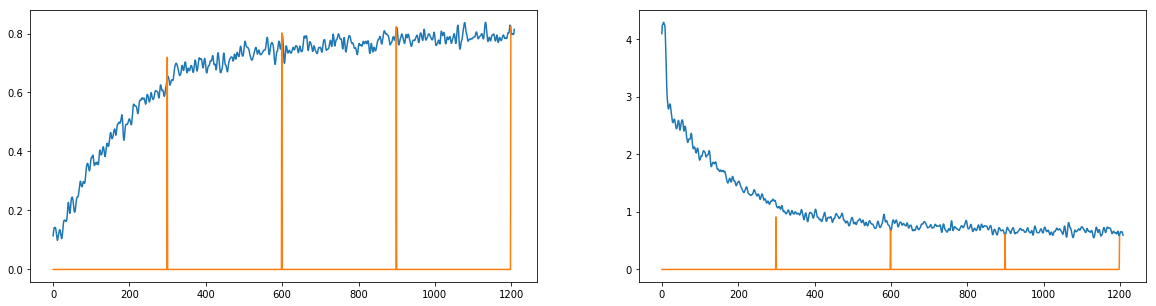

In [5]:
fig = plt.figure(figsize = (20, 5))
ax = plt.subplot(1, 2, 1)
ax.plot(smooth(train_summary.accurarcy, window_len=10))
ax.plot(validation_summary.accurarcy)
ax = plt.subplot(1, 2, 2)
ax.plot(smooth(train_summary.entropy, window_len=10))
ax.plot(validation_summary.entropy)


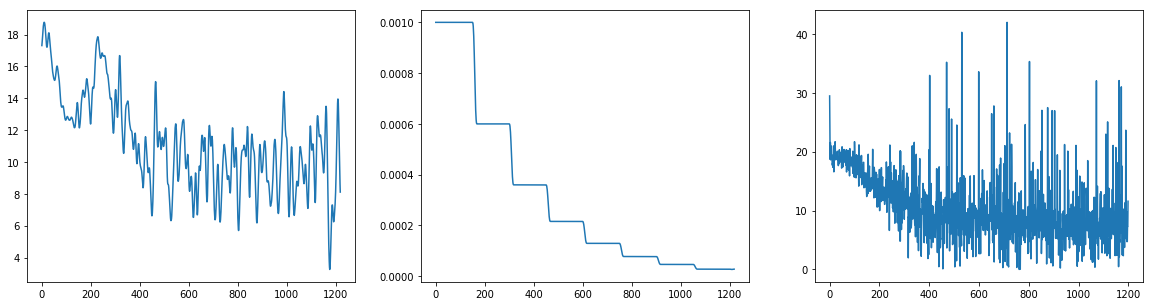

In [8]:
# plt.plot(train_summary.accurarcy)
fig = plt.figure(figsize = (20, 5))
ax = plt.subplot(1, 3, 1)
ax.plot(smooth(train_summary.triplet_loss_easy, window_len=20))
ax = plt.subplot(1, 3, 2)
ax.plot(smooth(train_summary.learning_rate, window_len=20))
ax = plt.subplot(1, 3, 3)
ax.plot(train_summary.triplet_loss_hard)